# Set up

In [4]:
import os
import json
import yaml
import shutil
import zipfile
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Import exported annotations

## wd

In [5]:
os.getcwd()

'/storage/ice1/2/4/jlee4338/ongoing/park_sign/nyc/code'

In [6]:
!ls ../cvat_export

always_keep_zip.txt
cvat_0129
cvat_0129_processed.zip
cvat_0129_processed_unzipped
cvat_0209_trainvaltest
cvat_0209_trainvaltest_processed.zip
cvat_0209_trainvaltest_processed_unzipped
cvat_0209_trainvaltest_processed_unzipped_wonyc
data_nc_1.yaml
data_nc_7.yaml
export_0122_0921
export_0122_0921.zip
export_0122_0921_processed.zip
export_0122_0921_processed_unzipped
export_0129_2234
export_0129_2234.zip
export_0209_1531
export_0209_1531.zip


In [7]:
#base_dir = "../../cvat_export/export_0122_0921"      
#base_dir = "../../cvat_export/export_0129_2234"                  

## unzip each exported dataset

In [5]:
base_dir = "../cvat_export"    

In [6]:
def unzip_exported(name_of_exported):
    # unzip
    base_dir = "../cvat_export"   # important
    zip_file_path = os.path.join(base_dir, name_of_exported+".zip")
    extract_to = os.path.join(base_dir, name_of_exported)
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)
    print(f"Files extracted to: {extract_to}")
    
    for which_folder in ["images", "labels"]:
        # remove the /train dir
        base_dir = "../cvat_export"   # important
        base_dir = os.path.join(base_dir, name_of_exported)
        source_dir = os.path.join(base_dir, f"{which_folder}/train") 
        destination_dir = os.path.join(base_dir, f"{which_folder}")

        try:
            # Ensure the destination directory exists
            os.makedirs(destination_dir, exist_ok=True)

            # Iterate through all files in the source directory
            for filename in os.listdir(source_dir):
                source_path = os.path.join(source_dir, filename)
                destination_path = os.path.join(destination_dir, filename)

                # Move only files (not subdirectories)
                if os.path.isfile(source_path):
                    shutil.move(source_path, destination_path)
                    #print(f"Moved: {source_path} -> {destination_path}")

            print("All files have been moved successfully.")
        except FileNotFoundError:
            print("The source or destination directory does not exist.")
        except PermissionError:
            print("Permission denied. Ensure you have the necessary permissions.")
        except Exception as e:
            print(f"An error occurred: {e}")      

        try:
            os.rmdir(source_dir)
            print(f"Successfully removed the empty directory: {source_dir}")
        except FileNotFoundError:
            print("The directory does not exist.")
        except OSError:
            print("The directory is not empty or cannot be removed.")
        except Exception as e:
            print(f"An error occurred: {e}")

In [10]:
unzip_exported("export_0122_0921")

Files extracted to: ../cvat_export/export_0122_0921
All files have been moved successfully.
Successfully removed the empty directory: ../cvat_export/export_0122_0921/images/train
All files have been moved successfully.
Successfully removed the empty directory: ../cvat_export/export_0122_0921/labels/train


In [11]:
unzip_exported("export_0129_2234")

Files extracted to: ../cvat_export/export_0129_2234
All files have been moved successfully.
Successfully removed the empty directory: ../cvat_export/export_0129_2234/images/train
All files have been moved successfully.
Successfully removed the empty directory: ../cvat_export/export_0129_2234/labels/train


In [70]:
unzip_exported("export_0209_1531")

Files extracted to: ../cvat_export/export_0209_1531
All files have been moved successfully.
Successfully removed the empty directory: ../cvat_export/export_0209_1531/images/train
All files have been moved successfully.
Successfully removed the empty directory: ../cvat_export/export_0209_1531/labels/train


# NYC

## export_0122_0921 ([:until_when])

In [13]:
base_dir = "../cvat_export/export_0122_0921"

In [14]:
until_when = 2700
folder_path = os.path.join(base_dir, "images")

filenames_img = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f)) & f.endswith((".jpg", ".png"))]
print(f"length of filenames_img: {len(filenames_img)}")

filenames_img = sorted(filenames_img)
filenames_img = filenames_img[:until_when]
print(f"length of filenames_img: {len(filenames_img)}")

length of filenames_img: 4974
length of filenames_img: 2700


In [15]:
filenames_img = [f.split(".j")[0] for f in filenames_img]
print(f"length of filenames_img: {len(filenames_img)}")

folder_path = os.path.join(base_dir, "labels")
filenames_lbl = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f)) & f.endswith(".txt")]
filenames_lbl = sorted(filenames_lbl)
print(f"length of filenames_lbl: {len(filenames_lbl)}")

filenames_lbl = [f for f in filenames_lbl if f.split(".t")[0] in filenames_img]
filenames_lbl = [f.split(".t")[0] for f in filenames_lbl]
print(f"length of filenames_lbl: {len(filenames_lbl)}")
print()
filenames_img = [f for f in filenames_img if f in filenames_lbl]
print(f"length of filenames_img: {len(filenames_img)}")
print()
print(filenames_img[0:5])
print(filenames_lbl[0:5])
print(filenames_img == filenames_lbl)

length of filenames_img: 2700
length of filenames_lbl: 3031
length of filenames_lbl: 758

length of filenames_img: 758

['signid_100-mutcd_R7-1-location_40.849854989,-73.89828847-heading_81.499', 'signid_100-mutcd_R7-1-location_40.849914685,-73.898255013-heading_139.414', 'signid_10000-mutcd_R7-51-location_40.712987445,-73.907559555-heading_222.59', 'signid_10000-mutcd_R7-51-location_40.712991965,-73.907642327-heading_147.066', 'signid_10001-mutcd_R7-51-location_40.712980208,-73.907427025-heading_221.412']
['signid_100-mutcd_R7-1-location_40.849854989,-73.89828847-heading_81.499', 'signid_100-mutcd_R7-1-location_40.849914685,-73.898255013-heading_139.414', 'signid_10000-mutcd_R7-51-location_40.712987445,-73.907559555-heading_222.59', 'signid_10000-mutcd_R7-51-location_40.712991965,-73.907642327-heading_147.066', 'signid_10001-mutcd_R7-51-location_40.712980208,-73.907427025-heading_221.412']
True


### add 300 images without annotations
- only for images, add 300 images without annotations to let the model also learn cases of absence, reducing false positive
- generate .txt files accordingly

In [16]:
until_when = 2700
folder_path = os.path.join(base_dir, "images")

temp = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f)) & f.endswith((".jpg", ".png"))]
temp = [f.split(".j")[0] for f in temp]
print(len(temp))

temp = sorted(temp)
temp = temp[:until_when]
print(len(temp))

filenames_img_empty_to_add = [f for f in temp if f not in filenames_img]
print(len(filenames_img_empty_to_add))

4974
2700
1942


In [17]:
filenames_img_empty_to_add = random.sample(filenames_img_empty_to_add, 300)
print(filenames_img_empty_to_add[0:5])

['signid_1577-mutcd_R7-20-location_40.784057336,-73.854981445-heading_225.106', 'signid_1839-mutcd_R7-20-location_40.701149888,-73.840068977-heading_272.922', 'signid_2420-mutcd_R7-27-location_40.883150877,-73.883943335-heading_217.956', 'signid_4295-mutcd_R7-40-location_40.60580392,-74.134280255-heading_126.508', 'signid_11773-mutcd_R7-61-location_40.704996409,-73.808723995-heading_203.665']


In [18]:
filenames_img = filenames_img + filenames_img_empty_to_add

### add corresponding .txt files

In [19]:
filenames_lbl = filenames_img
print(len(filenames_lbl))
print(len(filenames_img))

1058
1058


In [20]:
new_txt_files = filenames_img_empty_to_add

for f in new_txt_files:
    with open(os.path.join(base_dir, "labels", f) + ".txt", "w") as file:
        pass
    #print(f"Created {os.path.join(base_dir, 'labels', f) + '.txt'}")

### only keep good ones 758 -> 1058

In [21]:
folder_path = os.path.join(base_dir, "images")
files_to_keep = filenames_img

# Iterate through all files in the directory
for file_name in os.listdir(folder_path):
    file_path = os.path.join(folder_path, file_name)
    
    # Check if the current file is not in the keep list
    if file_name.split(".j")[0] not in files_to_keep:
        # Delete the file
        if os.path.isfile(file_path):  # Ensure it's a file, not a directory
            os.remove(file_path)
            
folder_path = os.path.join(base_dir, "labels")
files_to_keep = filenames_lbl

# Iterate through all files in the directory
for file_name in os.listdir(folder_path):
    file_path = os.path.join(folder_path, file_name)
    
    # Check if the current file is not in the keep list
    if file_name.split(".t")[0] not in files_to_keep:
        # Delete the file
        if os.path.isfile(file_path):  # Ensure it's a file, not a directory
            os.remove(file_path)
            
# Verify the result
folder_path = os.path.join(base_dir, "images")
filenames = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f)) & f.endswith((".jpg", ".png"))]
print(len(filenames))
print(filenames[0:5])

folder_path = os.path.join(base_dir, "labels")
filenames = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f)) & f.endswith((".txt"))]
print(len(filenames))
print(filenames[0:5])

1058
['signid_2536-mutcd_R7-30-location_40.757817717,-73.790853247-heading_339.619.jpg', 'signid_2816-mutcd_R7-40-location_40.877373379,-73.907154302-heading_80.907.jpg', 'signid_1518-mutcd_R7-20-location_40.73677392,-73.741717162-heading_231.57.jpg', 'signid_4473-mutcd_R7-40-location_40.699371053,-73.758372898-heading_221.498.jpg', 'signid_132-mutcd_R7-1-location_40.877985205,-73.885208504-heading_70.532.jpg']
1058
['signid_2633-mutcd_R7-30-location_40.714815741,-73.77481118-heading_325.551.txt', 'signid_2219-mutcd_R7-20-location_40.641770605,-74.089723674-heading_21.868.txt', 'signid_132-mutcd_R7-1-location_40.877985205,-73.885208504-heading_70.532.txt', 'signid_12131-mutcd_R7-61-location_40.655445968,-73.828435197-heading_196.128.txt', 'signid_2554-mutcd_R7-30-location_40.75780703,-73.782329031-heading_291.032.txt']


In [22]:
folder_path = os.path.join(base_dir, "images")
filenames_img = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f)) & f.endswith((".jpg", ".png"))]
print(len(filenames_img))
filenames_img = sorted(filenames_img)
filenames_img = [f.split(".j")[0] for f in filenames_img]

folder_path = os.path.join(base_dir, "labels")
filenames_lbl = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f)) & f.endswith((".txt"))]
print(len(filenames_lbl))
filenames_lbl = sorted(filenames_lbl)
filenames_lbl = [f.split(".t")[0] for f in filenames_lbl]

print(filenames_img == filenames_lbl)

1058
1058
True


## export_0129_2234 ([from_when:]

In [23]:
base_dir = "../cvat_export/export_0129_2234"

In [24]:
from_when = 2708
folder_path = os.path.join(base_dir, "images")

filenames_img = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f)) & f.endswith((".jpg", ".png"))]
print(f"length of filenames_img: {len(filenames_img)}")

filenames_img = sorted(filenames_img)
filenames_img = filenames_img[from_when:]
print(f"length of filenames_img: {len(filenames_img)}")

length of filenames_img: 4974
length of filenames_img: 2266


In [25]:
filenames_img = [f.split(".j")[0] for f in filenames_img]
print(f"length of filenames_img: {len(filenames_img)}")

folder_path = os.path.join(base_dir, "labels")
filenames_lbl = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f)) & f.endswith(".txt")]
filenames_lbl = sorted(filenames_lbl)
print(f"length of filenames_lbl: {len(filenames_lbl)}")

filenames_lbl = [f for f in filenames_lbl if f.split(".t")[0] in filenames_img]
filenames_lbl = [f.split(".t")[0] for f in filenames_lbl]
print(f"length of filenames_lbl: {len(filenames_lbl)}")
print()
filenames_img = [f for f in filenames_img if f in filenames_lbl]
print(f"length of filenames_img: {len(filenames_img)}")
print()
print(filenames_img[0:5])
print(filenames_lbl[0:5])
print(filenames_img == filenames_lbl)

length of filenames_img: 2266
length of filenames_lbl: 2952
length of filenames_lbl: 246

length of filenames_img: 246

['signid_4541-mutcd_R7-40-location_40.596626588,-73.758655926-heading_28.437', 'signid_4547-mutcd_R7-40-location_40.708707419,-73.851802767-heading_318.369', 'signid_4557-mutcd_R7-40-location_40.598142068,-73.744884888-heading_141.532', 'signid_4568-mutcd_R7-40-location_40.630990272,-74.129435441-heading_313.412', 'signid_4577-mutcd_R7-40-location_40.694590582,-73.75073031-heading_218.686']
['signid_4541-mutcd_R7-40-location_40.596626588,-73.758655926-heading_28.437', 'signid_4547-mutcd_R7-40-location_40.708707419,-73.851802767-heading_318.369', 'signid_4557-mutcd_R7-40-location_40.598142068,-73.744884888-heading_141.532', 'signid_4568-mutcd_R7-40-location_40.630990272,-74.129435441-heading_313.412', 'signid_4577-mutcd_R7-40-location_40.694590582,-73.75073031-heading_218.686']
True


In [26]:
folder_path = os.path.join(base_dir, "images")
files_to_keep = filenames_img

# Iterate through all files in the directory
for file_name in os.listdir(folder_path):
    file_path = os.path.join(folder_path, file_name)
    
    # Check if the current file is not in the keep list
    if file_name.split(".j")[0] not in files_to_keep:
        # Delete the file
        if os.path.isfile(file_path):  # Ensure it's a file, not a directory
            os.remove(file_path)
            
folder_path = os.path.join(base_dir, "labels")
files_to_keep = filenames_lbl

# Iterate through all files in the directory
for file_name in os.listdir(folder_path):
    file_path = os.path.join(folder_path, file_name)
    
    # Check if the current file is not in the keep list
    if file_name.split(".t")[0] not in files_to_keep:
        # Delete the file
        if os.path.isfile(file_path):  # Ensure it's a file, not a directory
            os.remove(file_path)
            
# Verify the result
folder_path = os.path.join(base_dir, "images")
filenames = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f)) & f.endswith((".jpg", ".png"))]
print(len(filenames))
print(filenames[0:5])

folder_path = os.path.join(base_dir, "labels")
filenames = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f)) & f.endswith((".txt"))]
print(len(filenames))
print(filenames[0:5])

246
['signid_8103-mutcd_R7-40-location_40.726247953,-73.943657329-heading_299.218.jpg', 'signid_4660-mutcd_R7-40-location_40.574274153,-74.115248416-heading_178.287.jpg', 'signid_7317-mutcd_R7-40-location_40.579158889,-73.839165807-heading_114.433.jpg', 'signid_9895-mutcd_R7-45-location_40.741399617,-73.863811908-heading_229.389.jpg', 'signid_9425-mutcd_R7-44-location_40.785368298,-73.844487462-heading_301.694.jpg']
246
['signid_9468-mutcd_R7-44-location_40.703414632,-73.918949865-heading_91.716.txt', 'signid_8626-mutcd_R7-40-location_40.781305354,-73.772015626-heading_105.929.txt', 'signid_9804-mutcd_R7-45-location_40.675864858,-74.00434417-heading_243.305.txt', 'signid_9820-mutcd_R7-45-location_40.723064472,-73.911513893-heading_322.634.txt', 'signid_9877-mutcd_R7-45-location_40.737658842,-73.886479479-heading_62.037.txt']


In [27]:
folder_path = os.path.join(base_dir, "images")
filenames_img = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f)) & f.endswith((".jpg", ".png"))]
print(len(filenames_img))
filenames_img = sorted(filenames_img)
filenames_img = [f.split(".j")[0] for f in filenames_img]

folder_path = os.path.join(base_dir, "labels")
filenames_lbl = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f)) & f.endswith((".txt"))]
print(len(filenames_lbl))
filenames_lbl = sorted(filenames_lbl)
filenames_lbl = [f.split(".t")[0] for f in filenames_lbl]

print(filenames_img == filenames_lbl)

246
246
True


## trainval: integrate two NYC datasets to cvat_0209_trainvaltest

In [28]:
# Define source folders
base_dir = "../cvat_export"
source_folders = [os.path.join(base_dir, "export_0122_0921", "images"), os.path.join(base_dir, "export_0129_2234", "images")]
# Define destination folder
destination_folder = os.path.join(base_dir, "cvat_0209_trainvaltest", "images", "trainval")
# Ensure destination exists
os.makedirs(destination_folder, exist_ok=True)
# Move files from both source folders
for folder in source_folders:
    for file_name in os.listdir(folder):
        source_path = os.path.join(folder, file_name)
        destination_path = os.path.join(destination_folder, file_name)
        # Move file only if it's not a directory
        if os.path.isfile(source_path):
            shutil.copy(source_path, destination_path)
            
source_folders = [os.path.join(base_dir, "export_0122_0921", "labels"), os.path.join(base_dir, "export_0129_2234", "labels")]
# Define destination folder
destination_folder = os.path.join(base_dir, "cvat_0209_trainvaltest", "labels", "trainval")
# Ensure destination exists
os.makedirs(destination_folder, exist_ok=True)
# Move files from both source folders
for folder in source_folders:
    for file_name in os.listdir(folder):
        source_path = os.path.join(folder, file_name)
        destination_path = os.path.join(destination_folder, file_name)
        # Move file only if it's not a directory
        if os.path.isfile(source_path):
            shutil.copy(source_path, destination_path)

## prepare for NC-5 model

### mapping from nc_40 to nc_5

In [19]:
# List of all 40 classes
classes = [
    "empty-so-disregard",
    "R7-1",
    "R7-20",
    "R7-21",
    "R7-22",
    "R7-24",
    "R7-27",
    "R7-28",
    "R7-30",
    "R7-31",
    "R7-32",
    "R7-34",
    "R7-40",
    "R7-41",
    "R7-42",
    "R7-43",
    "R7-44",
    "R7-45",
    "R7-49",
    "R7-50",
    "R7-51",
    "R7-55",
    "R7-56",
    "R7-57",
    "R7-59",
    "R7-61",
    "R7-65",
    "R7-66",
    "R7-68",
    "R7-69",
    "R7-70",
    "R7-88",
    "R7-100",
    "R7-101",
    "R7-110",
    "R7-125",
    "R7-128",
    "R7-182",
    "truck-loading-only",
    "authorized-vehicle-only"
]

In [20]:
# Set of permissive classes
prohibAnyT = {"R7-1",
                "R7-20",
                "R7-40",
                'R7-65', # NO PARKING LOADING ZONE 
                'R7-66', # NO PARKING PASSENGER LOADING ZONE 
                'R7-68', # NO PARKING ANYTIME CONSTRUCTION 
                "R7-110"} # TOW AWAY ZONE 
prohibSomeT = {
    # HalfDay
             "R7-24",
             "R7-27",
             "R7-28",
             "R7-30",
             "R7-31",
             "R7-32",
             "R7-34", # NO STANDING 1-7PM EXCEPT SUNDAY
            "R7-49",
            "R7-50",
            "R7-51",
            "R7-55",
            "R7-56",
            "R7-57",
            "R7-59",  # NO PARKING 7-10AM MON THRU FRI
    # FullDay
             "R7-21",
             "R7-22",
             "R7-41", # NO PARKING 8AM-MIDNIGHT EXCEPT SUNDAY
             "R7-42",
             "R7-43",
             "R7-44",
             "R7-45",
             "R7-69", # NO PARKING 7AM-6PM MON THRU FRI CONSTRUCTION
             "R7-70"} # NO PARKING 7AM-4PM SCHOOL DAYS
prohibBusStop = {"R7-61"}
prohibCleaning = {"R7-88"}
allow = {"R7-125", 
         "R7-128",
         "R7-182", # 2 HOUR PARKING 9AM-7PM EXCEPT SUNDAY
         "R7-100", # PARALLEL PARKING ONLY 
         "R7-101"  # ANGLE PARKING ONLY 
        }

In [21]:
# Mapping function with refactored logic
def map_to_category(class_name):
    # Define category mappings
    category_mapping = {
        "prohibAnyT": prohibAnyT,
        "prohibSomeT": prohibSomeT,
        "prohibBusStop": prohibBusStop,
        "prohibCleaning": prohibCleaning,
        "allow": allow
    }

    # Check the class_name against each category
    for category, class_set in category_mapping.items():
        if class_name in class_set:
            return category

    # Default return if no match is found
    return "unknown"

In [22]:
# Test the mapping function
mapped_classes = {cls: map_to_category(cls) for cls in classes}

# Print the mapping
mapped_classes

{'empty-so-disregard': 'unknown',
 'R7-1': 'prohibAnyT',
 'R7-20': 'prohibAnyT',
 'R7-21': 'prohibSomeT',
 'R7-22': 'prohibSomeT',
 'R7-24': 'prohibSomeT',
 'R7-27': 'prohibSomeT',
 'R7-28': 'prohibSomeT',
 'R7-30': 'prohibSomeT',
 'R7-31': 'prohibSomeT',
 'R7-32': 'prohibSomeT',
 'R7-34': 'prohibSomeT',
 'R7-40': 'prohibAnyT',
 'R7-41': 'prohibSomeT',
 'R7-42': 'prohibSomeT',
 'R7-43': 'prohibSomeT',
 'R7-44': 'prohibSomeT',
 'R7-45': 'prohibSomeT',
 'R7-49': 'prohibSomeT',
 'R7-50': 'prohibSomeT',
 'R7-51': 'prohibSomeT',
 'R7-55': 'prohibSomeT',
 'R7-56': 'prohibSomeT',
 'R7-57': 'prohibSomeT',
 'R7-59': 'prohibSomeT',
 'R7-61': 'prohibBusStop',
 'R7-65': 'prohibAnyT',
 'R7-66': 'prohibAnyT',
 'R7-68': 'prohibAnyT',
 'R7-69': 'prohibSomeT',
 'R7-70': 'prohibSomeT',
 'R7-88': 'prohibCleaning',
 'R7-100': 'allow',
 'R7-101': 'allow',
 'R7-110': 'prohibAnyT',
 'R7-125': 'allow',
 'R7-128': 'allow',
 'R7-182': 'allow',
 'truck-loading-only': 'unknown',
 'authorized-vehicle-only': 'unkno

In [23]:
mapped_classes_keys = list(mapped_classes.keys())
#mapped_classes_keys
print(mapped_classes_keys[0])
print(mapped_classes[mapped_classes_keys[0]])

empty-so-disregard
unknown


### apply on cvat_0209_trainvaltest

In [24]:
base_dir = "../cvat_export/cvat_0209_trainvaltest"

In [25]:
label_folder = os.path.join(base_dir, "labels", "train")  # it should be trainval
label_folder

'../cvat_export/cvat_0209_trainvaltest/labels/train'

In [26]:
distinct_indx = []

txt_filenames = [f for f in os.listdir(label_folder) if (f.endswith('.txt') and not f.startswith('._'))]
print(len(txt_filenames))
txt_filenames[0:5]

for name in txt_filenames:
    # File path
    file_path = os.path.join(label_folder, name) 
    
    # Read, modify, and overwrite the file
    with open(file_path, "r") as infile:
        for line in infile:
            parts = line.strip().split()  # Split the line into parts
            if parts:  # Ensure the line is not empty
                #print(parts[0], end=",")
                distinct_indx.append(int(parts[0]))
                
distinct_indx = set(distinct_indx)
print(distinct_indx)

1346
{0, 1, 2, 3, 4}


In [28]:
classes =  {"prohibAnyT": 0,
            "prohibSomeT": 1,
            "prohibBusStop": 2,
            "prohibCleaning": 3,
            "allow": 4}

txt_filenames = [f for f in os.listdir(label_folder) if (f.endswith('.txt') and not f.startswith('._'))]

for name in txt_filenames:
    # File path
    file_path = os.path.join(label_folder, name) 
    
    # Read, modify, and overwrite the file
    with open(file_path, "r") as infile:
        lines4outfile = []
        for line in infile:
            parts = line.strip().split()  # Split the line into parts
            if len(parts) > 0:  # Ensure the line is not empty
                parts[0] = mapped_classes[mapped_classes_keys[int(parts[0])]]   
                #print(parts[0])
                parts[0] = str(parts[0])
                if parts[0] == "unknown":
                    print(f"discard unknown instances: {parts[0]}")
                    lines4outfile = []
                else:
                    parts[0] = str(classes[parts[0]])
                    lines4outfile.append(" ".join(parts))  # Rejoin the line

    #print(lines4outfile)

    # Save the modified content back to the same file
    with open(file_path, "w") as outfile:
        lines4outfile = "\n".join(lines4outfile)
        outfile.write(lines4outfile.rstrip("\n"))

discard unknown instances: unknown
discard unknown instances: unknown
discard unknown instances: unknown
discard unknown instances: unknown
discard unknown instances: unknown
discard unknown instances: unknown
discard unknown instances: unknown
discard unknown instances: unknown
discard unknown instances: unknown
discard unknown instances: unknown
discard unknown instances: unknown
discard unknown instances: unknown
discard unknown instances: unknown
discard unknown instances: unknown
discard unknown instances: unknown
discard unknown instances: unknown
discard unknown instances: unknown
discard unknown instances: unknown
discard unknown instances: unknown
discard unknown instances: unknown
discard unknown instances: unknown
discard unknown instances: unknown
discard unknown instances: unknown
discard unknown instances: unknown
discard unknown instances: unknown
discard unknown instances: unknown
discard unknown instances: unknown
discard unknown instances: unknown
discard unknown inst

In [ ]:
distinct_indx = []

txt_filenames = [f for f in os.listdir(label_folder) if (f.endswith('.txt') and not f.startswith('._'))]
print(len(txt_filenames))
txt_filenames[0:5]

for name in txt_filenames:
    # File path
    file_path = os.path.join(label_folder, name) 
    
    # Read, modify, and overwrite the file
    with open(file_path, "r") as infile:
        for line in infile:
            parts = line.strip().split()  # Split the line into parts
            if parts:  # Ensure the line is not empty
                #print(parts[0], end=",")
                distinct_indx.append(int(parts[0]))
                
distinct_indx = set(distinct_indx)
print(distinct_indx)

In [39]:
txt_filenames = [f for f in os.listdir(label_folder) if (f.endswith('.txt') and not f.startswith('._'))]

for i, name in enumerate(txt_filenames[:20]):
    # File path
    file_path = os.path.join(label_folder, name) 
    print(f"{i+1}th: {file_path}")
    # Read, modify, and overwrite the file
    with open(file_path, "r") as file:
        data = file.read()
        print(data)
print("\nnext group following: ")

1th: ../cvat_export/cvat_0209_trainvaltest/labels/trainval/signid_2633-mutcd_R7-30-location_40.714815741,-73.77481118-heading_325.551.txt

2th: ../cvat_export/cvat_0209_trainvaltest/labels/trainval/signid_2219-mutcd_R7-20-location_40.641770605,-74.089723674-heading_21.868.txt
0 0.888320 0.403406 0.018828 0.044437
3th: ../cvat_export/cvat_0209_trainvaltest/labels/trainval/signid_132-mutcd_R7-1-location_40.877985205,-73.885208504-heading_70.532.txt
1 0.825906 0.300078 0.053688 0.063906
4th: ../cvat_export/cvat_0209_trainvaltest/labels/trainval/signid_12131-mutcd_R7-61-location_40.655445968,-73.828435197-heading_196.128.txt
0 0.957555 0.306086 0.084891 0.065641
5th: ../cvat_export/cvat_0209_trainvaltest/labels/trainval/signid_2554-mutcd_R7-30-location_40.75780703,-73.782329031-heading_291.032.txt

6th: ../cvat_export/cvat_0209_trainvaltest/labels/trainval/signid_10183-mutcd_R7-61-location_40.735720994,-73.850798215-heading_306.768.txt
2 0.532422 0.441375 0.050469 0.081625
7th: ../cvat_exp

## check distribution of nc_5

In [29]:
base_dir = "../cvat_export/cvat_0209_trainvaltest"

In [30]:
classes_idx_nm =  {
    0: "prohibAnyT",
    1: "prohibSomeT",
    2: "prohibBusStop",
    3: "prohibCleaning",
    4: "allow"}

In [31]:
def show_dist(txt_filenames):
    distinct_label_list = list()
    for name in txt_filenames:
        # File path
        file_path = os.path.join(folder, name) 

        # Read, modify, and overwrite the file
        with open(file_path, "r") as infile:
            lines4outfile = []
            for line in infile:
                parts = line.strip().split()  # Split the line into parts
                if parts:  # Ensure the line is not empty
                    #print(parts[0], mutcd_dict[int(parts[0])])
                    distinct_label_list.append(str(classes_idx_nm[int(parts[0])]))
    print(distinct_label_list[0:5])
    print()


    # List with repeated elements
    # Count frequencies
    frequency_count = Counter(distinct_label_list)
    frequency_count = pd.DataFrame(list(frequency_count.items()),
                     columns=["Class", "Frequency"])
    frequency_count = frequency_count.sort_values(by='Frequency', ascending=False)
    print(frequency_count)
    print()

    # Create the bar plot with Seaborn
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(data=frequency_count, x='Class', y='Frequency')

    # Add annotations to the bars
    ax.bar_label(ax.containers[0], fontsize=10, label_type='edge')

    # Customize the plot
    ax.set_title('Frequency of parking sign class', fontsize=16)
    ax.set_xlabel('Class', fontsize=12)
    ax.set_ylabel('Frequency', fontsize=12)
    ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability
    plt.tight_layout()

    # Show the plot
    plt.show()

['prohibAnyT', 'prohibAnyT', 'prohibAnyT', 'prohibAnyT', 'prohibAnyT']

        Class  Frequency
0  prohibAnyT        136



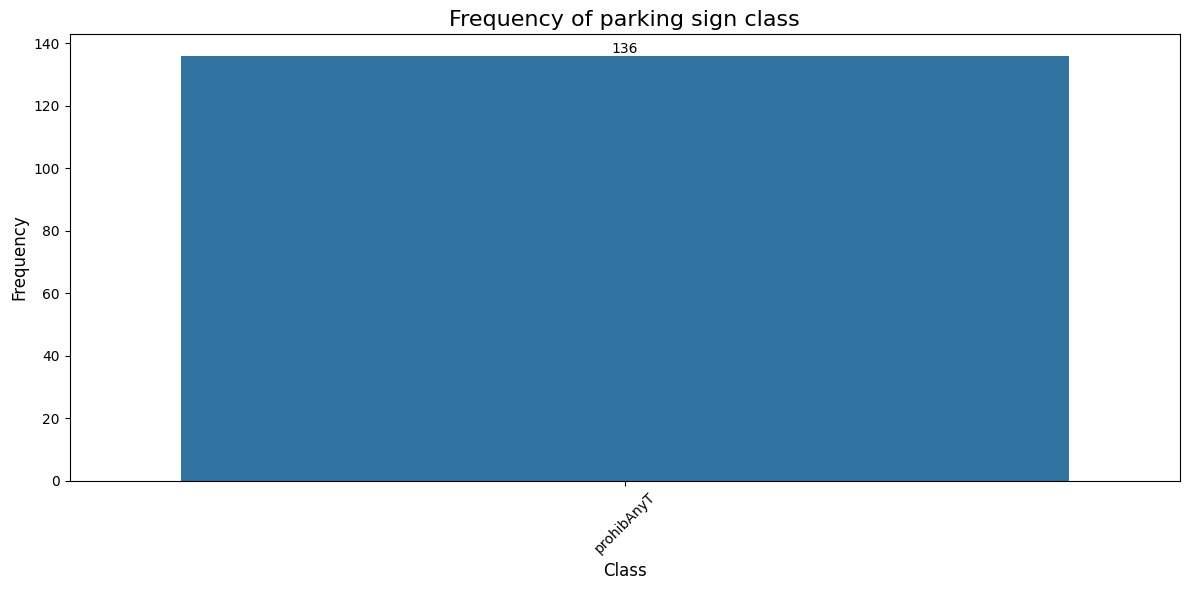

In [32]:
folder = os.path.join(base_dir, "labels", "train") 
txt_filenames = [f for f in os.listdir(folder) if (f.endswith('.txt') and not f.startswith('._'))]
show_dist(txt_filenames)

# ATL

## export_0209_1531 (empty images are included, but need to generate new .txt files)

In [71]:
base_dir = "../cvat_export/export_0209_1531"

In [72]:
folder_path = os.path.join(base_dir, "images")
filenames_img = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f)) & f.endswith((".jpg", ".png"))]
filenames_img = [f.split(".j")[0] for f in filenames_img]
filenames_img = sorted(filenames_img)
print(f"length of filenames_img: {len(filenames_img)}")

length of filenames_img: 357


In [73]:
folder_path = os.path.join(base_dir, "labels")
filenames_lbl = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f)) & f.endswith((".txt"))]
filenames_lbl = [f.split(".t")[0] for f in filenames_lbl]
filenames_lbl = sorted(filenames_lbl)
print(f"length of filenames_lbl: {len(filenames_lbl)}")

length of filenames_lbl: 208


In [74]:
filenames_img_empty_to_add = [f for f in filenames_img if f not in filenames_lbl]
print(f"length of filenames_img_empty_to_add: {len(filenames_img_empty_to_add)}")

length of filenames_img_empty_to_add: 149


In [75]:
new_txt_files = filenames_img_empty_to_add
for f in new_txt_files:
    with open(os.path.join(base_dir, "labels", f) + ".txt", "w") as file:
        pass
    #print(f"Created {os.path.join(base_dir, 'labels', f) + '.txt'}")

In [76]:
folder_path = os.path.join(base_dir, "images")
filenames_img = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f)) & f.endswith((".jpg", ".png"))]
print(len(filenames_img))
filenames_img = sorted(filenames_img)
filenames_img = [f.split(".j")[0] for f in filenames_img]

folder_path = os.path.join(base_dir, "labels")
filenames_lbl = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f)) & f.endswith((".txt"))]
print(len(filenames_lbl))
filenames_lbl = sorted(filenames_lbl)
filenames_lbl = [f.split(".t")[0] for f in filenames_lbl]

print(filenames_img == filenames_lbl)

357
357
True


## check distribution of nc_5

In [1]:
base_dir = "../cvat_export/export_0209_1531"

In [2]:
classes_idx_nm =  {
    0: "prohibAnyT",
    1: "prohibSomeT",
    2: "prohibBusStop",
    3: "prohibCleaning",
    4: "allow"}

def show_dist(txt_filenames):
    distinct_label_list = list()
    for name in txt_filenames:
        # File path
        file_path = os.path.join(folder, name) 

        # Read, modify, and overwrite the file
        with open(file_path, "r") as infile:
            lines4outfile = []
            for line in infile:
                parts = line.strip().split()  # Split the line into parts
                if parts:  # Ensure the line is not empty
                    #print(parts[0], mutcd_dict[int(parts[0])])
                    distinct_label_list.append(str(classes_idx_nm[int(parts[0])]))
    print(distinct_label_list[0:5])
    print()


    # List with repeated elements
    # Count frequencies
    frequency_count = Counter(distinct_label_list)
    frequency_count = pd.DataFrame(list(frequency_count.items()),
                     columns=["Class", "Frequency"])
    frequency_count = frequency_count.sort_values(by='Frequency', ascending=False)
    print(frequency_count)
    print()

    # Create the bar plot with Seaborn
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(data=frequency_count, x='Class', y='Frequency')

    # Add annotations to the bars
    ax.bar_label(ax.containers[0], fontsize=10, label_type='edge')

    # Customize the plot
    ax.set_title('Frequency of parking sign class', fontsize=16)
    ax.set_xlabel('Class', fontsize=12)
    ax.set_ylabel('Frequency', fontsize=12)
    ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability
    plt.tight_layout()

    # Show the plot
    plt.show()

In [3]:
folder = os.path.join(base_dir, "labels") 
txt_filenames = [f for f in os.listdir(folder) if (f.endswith('.txt') and not f.startswith('._'))]
show_dist(txt_filenames)

NameError: name 'os' is not defined

## split within ATL into trainval and test

In [80]:
base_dir = "../cvat_export/export_0209_1531"

In [81]:
folder_path = os.path.join(base_dir, "images")  
filenames_img = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f)) & f.endswith((".jpg", ".png"))]
filenames_img = sorted(filenames_img)
print(len(filenames_img))
filenames_img = [f.split(".j")[0] for f in filenames_img]

folder_path = os.path.join(base_dir, "labels")  
filenames_lbl = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f)) & f.endswith((".txt"))]
filenames_lbl = sorted(filenames_lbl)
print(len(filenames_lbl))
filenames_lbl = [f.split(".t")[0] for f in filenames_lbl]

print(filenames_img == filenames_lbl)

357
357
True


In [82]:
folder_path = os.path.join(base_dir, "images")  

filenames_img = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f)) & f.endswith((".jpg"))]
filenames_img = sorted(filenames_img)
print(len(filenames_img))

filenames_img = [f for f in os.listdir(folder_path) if not f.startswith('._')]
filenames_img = [f.split(".j")[0] for f in filenames_img]

random.seed(0)
random.shuffle(filenames_img)

# Calculate the split index
split_0 = int(len(filenames_img) * 0.66)

# Split into training and testing sets
trainval_ids = filenames_img[:split_0]
test_ids = filenames_img[split_0:]
print(len(trainval_ids))
print(trainval_ids[0:5])
print(len(test_ids))
print(test_ids[0:5])

357
236
['gsv__80__5__left__45.223__2023-01__33.76098598,-84.388611085', 'gsv__351__13__right__139.902__2022-03__33.777099831,-84.380574344', 'gsv__225__12__right__314.268__2024-07__33.764652703,-84.391126216', 'gsv__8__3__right__276.482__2024-07__33.753978769,-84.384804349', 'gsv__525__9__left__-43.846__2024-07__33.755557188,-84.38363038']
123
['gsv__389__1__left__-3.434__2022-05__33.753331771,-84.385118285', 'gsv__89__19__right__nan__2023-01__33.776026604,-84.375281619', 'gsv__60__9__right__266.417__2024-07__33.753997823,-84.3807049', 'gsv__335__3__right__227.247__2023-09__33.781444413,-84.384063565', 'gsv__206__10__right__139.799__2024-07__33.773644285,-84.384097886']


In [83]:
def distribute_after_split(FOLDER, EXPANDER):
    source_folder = os.path.join(base_dir, FOLDER)  
    target_folders = [os.path.join(source_folder, "trainval"), 
                      os.path.join(source_folder, "test")]
    expander = EXPANDER
    sets = [trainval_ids, test_ids]
    
    for i in range(2):
        set_i = sets[i]
        target_folder_i = target_folders[i]
        
        set_i = [f + expander for f in set_i]
    
        os.makedirs(target_folder_i, exist_ok=True)
    
        for f in set_i:
            source_file = os.path.join(source_folder, f)
            target_file = os.path.join(target_folder_i, f)
        
            if os.path.isfile(source_file):
                shutil.move(source_file, target_file)
                #print(f"Copied: {filename}")
            #else:
                #print(f"File not found: {filename}")
    
    root_dir = source_folder
    
    # Traverse the directory recursively
    for root, dirs, files in os.walk(root_dir):
        num_files = len(files)  # Count files in the current folder
        folder_name = os.path.relpath(root, root_dir)  # Relative folder path
        print(f"Folder: {folder_name}, Number of files: {num_files}")

In [84]:
distribute_after_split("images", ".jpg")

Folder: ., Number of files: 0
Folder: trainval, Number of files: 235
Folder: test, Number of files: 122


In [85]:
distribute_after_split("labels", ".txt")

Folder: ., Number of files: 0
Folder: trainval, Number of files: 235
Folder: test, Number of files: 122


## add ATL_trainval to cvat_0209_trainvaltest/imglbl/trainval

In [86]:
base_dir = "../cvat_export/export_0209_1531"

In [87]:
folder_path = os.path.join(base_dir, "images", "trainval")  
filenames_img = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f)) & f.endswith((".jpg", ".png"))]
filenames_img = sorted(filenames_img)
print(len(filenames_img))
filenames_img = [f.split(".j")[0] for f in filenames_img]

folder_path = os.path.join(base_dir, "labels", "trainval") 
filenames_lbl = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f)) & f.endswith((".txt"))]
filenames_lbl = sorted(filenames_lbl)
print(len(filenames_lbl))
filenames_lbl = [f.split(".t")[0] for f in filenames_lbl]

print(filenames_img == filenames_lbl)

235
235
True


In [88]:
base_dir = "../cvat_export"
PATH_FROM = "export_0209_1531"
PATH_TO = "cvat_0209_trainvaltest"
FOLDER = "images"
SPLIT = "trainval"

def move_after_split(PATH_FROM, PATH_TO, FOLDER, SPLIT):
    source_dir = os.path.join(base_dir, PATH_FROM, FOLDER, SPLIT)  
    destination_dir = os.path.join(base_dir, PATH_TO, FOLDER, SPLIT) 
    os.makedirs(destination_dir, exist_ok=True)
    
    for filename in os.listdir(source_dir):
        source_path = os.path.join(source_dir, filename)
        destination_path = os.path.join(destination_dir, filename)

        # Move only files (not subdirectories)
        if os.path.isfile(source_path):
            shutil.move(source_path, destination_path)
            #print(f"Moved: {source_path} -> {destination_path}")

In [89]:
move_after_split(PATH_FROM = "export_0209_1531", 
                 PATH_TO = "cvat_0209_trainvaltest", 
                 FOLDER = "images",
                 SPLIT = "trainval")

In [90]:
move_after_split(PATH_FROM = "export_0209_1531", 
                 PATH_TO = "cvat_0209_trainvaltest", 
                 FOLDER = "labels",
                 SPLIT = "trainval")

## add ATL_test to cvat_0209_trainvaltest/imglbl/test

In [91]:
move_after_split(PATH_FROM = "export_0209_1531", 
                 PATH_TO = "cvat_0209_trainvaltest", 
                 FOLDER = "images",
                 SPLIT = "test")

In [92]:
move_after_split(PATH_FROM = "export_0209_1531", 
                 PATH_TO = "cvat_0209_trainvaltest", 
                 FOLDER = "labels",
                 SPLIT = "test")

# Split train / val in cvat_0209_trainvaltest

## check status

In [93]:
from pathlib import Path

In [94]:
!ls -a ../cvat_export/cvat_0209_trainvaltest

.  ..  images  labels


In [95]:
base_dir = "../cvat_export/cvat_0209_trainvaltest"

In [96]:
directory = Path(os.path.join(base_dir, "images", "trainval"))
num_files = sum(1 for entry in os.scandir(directory) if entry.is_file())
print(f"Number of files: {num_files}")

directory = Path(os.path.join(base_dir, "labels", "trainval"))
num_files = sum(1 for entry in os.scandir(directory) if entry.is_file())
print(f"Number of files: {num_files}")

Number of files: 1584
Number of files: 1584


In [97]:
directory = Path(os.path.join(base_dir, "images", "test"))
num_files = sum(1 for entry in os.scandir(directory) if entry.is_file())
print(f"Number of files: {num_files}")

directory = Path(os.path.join(base_dir, "labels", "test"))
num_files = sum(1 for entry in os.scandir(directory) if entry.is_file())
print(f"Number of files: {num_files}")

Number of files: 167
Number of files: 167


## split

In [98]:
folder_path = os.path.join(base_dir, "images", "trainval")  
filenames_img = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f)) & f.endswith((".jpg", ".png"))]
filenames_img = sorted(filenames_img)
print(len(filenames_img))
filenames_img = [f.split(".j")[0] for f in filenames_img]

folder_path = os.path.join(base_dir, "labels", "trainval")  
filenames_lbl = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f)) & f.endswith((".txt"))]
filenames_lbl = sorted(filenames_lbl)
print(len(filenames_lbl))
filenames_lbl = [f.split(".t")[0] for f in filenames_lbl]

print(filenames_img == filenames_lbl)
print()
print(len(set(filenames_img)))
print(len(set(filenames_lbl)))

1584
1584
True

1584
1584


In [101]:
folder_path = os.path.join(base_dir, "images", "trainval")  

filenames_img = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f)) & f.endswith((".jpg"))]
filenames_img = sorted(filenames_img)
print(len(filenames_img))

filenames_img = [f for f in os.listdir(folder_path) if not f.startswith('._')]
filenames_img = [f.split(".j")[0] for f in filenames_img]

random.seed(0)
random.shuffle(filenames_img)

# Calculate the split index
split_0 = int(len(filenames_img) * 0.85)

# Split into training and testing sets
train_ids = filenames_img[:split_0]
val_ids = filenames_img[split_0:]
print(len(train_ids))
print(train_ids[0:5])
print(len(val_ids))
print(val_ids[0:5])

1584
1346
['signid_10677-mutcd_R7-61-location_40.674865374,-73.806036933-heading_94.387', 'signid_1012-mutcd_R7-20-location_40.662395857,-73.854283143-heading_278.512', 'signid_12267-mutcd_R7-61-location_40.755349257,-73.866171956-heading_293.765', 'gsv__525__14__left__-43.998__2024-07__33.755553647,-84.383410259', 'signid_8467-mutcd_R7-40-location_40.697939728,-73.892916808-heading_231.048']
238
['gsv__525__12__left__-43.936__2024-07__33.755555353,-84.383520761', 'signid_2161-mutcd_R7-20-location_40.70497095,-73.879629072-heading_126.334', 'signid_2462-mutcd_R7-28-location_40.754329629,-73.897162091-heading_330.041', 'signid_2089-mutcd_R7-20-location_40.731414521,-73.821917629-heading_216.868', 'signid_302-mutcd_R7-125-location_40.632736039,-74.116847205-heading_89.717']


In [100]:
folder = os.path.join(base_dir, "labels")  
filenames_lbl = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f)) & f.endswith((".txt"))]
filenames_lbl = sorted(filenames_lbl)
print(len(filenames_lbl))
filenames_lbl = [f for f in filenames_lbl if f.split(".t")[0] in val_ids] # important: val_ids
print(len(filenames_lbl))
filenames_lbl[0:5]

0
0


[]

['R7-51', 'R7-57', 'R7-57', 'R7-61', 'R7-61']

     Class  Frequency
5    R7-20         23
2    R7-61         13
3    R7-40         11
11   R7-88          9
4   R7-128          8
8    R7-45          7
16   R7-30          6
17   R7-32          5
9     R7-1          5
1    R7-57          4
20   R7-44          3
15   R7-28          2
19   R7-42          2
0    R7-51          2
10   R7-70          2
14   R7-27          1
13   R7-24          1
12   R7-22          1
7    R7-43          1
18  R7-125          1
6    R7-49          1



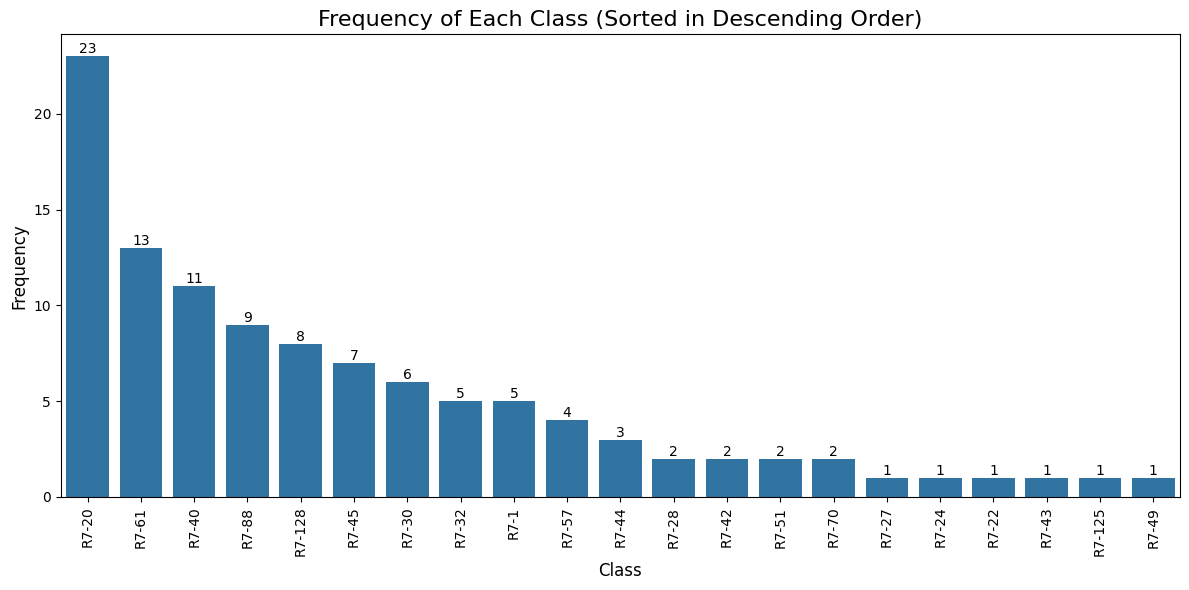

In [109]:
show_dist(filenames_lbl)

In [102]:
base_dir = "../cvat_export/cvat_0209_trainvaltest"

In [103]:
def distribute_after_split(FOLDER, EXPANDER):
    source_folder = os.path.join(base_dir, FOLDER, "trainval")  
    target_folders = [os.path.join(base_dir, FOLDER, "train"), 
                      os.path.join(base_dir, FOLDER, "val")]
    expander = EXPANDER
    sets = [train_ids, val_ids]
    
    for i in range(2):
        set_i = sets[i]
        target_folder_i = target_folders[i]
        
        set_i = [f + expander for f in set_i]
    
        os.makedirs(target_folder_i, exist_ok=True)
    
        for f in set_i:
            source_file = os.path.join(source_folder, f)
            target_file = os.path.join(target_folder_i, f)
        
            if os.path.isfile(source_file):
                shutil.move(source_file, target_file)
                #print(f"Copied: {filename}")
            #else:
                #print(f"File not found: {filename}")
    
    root_dir = os.path.join(base_dir, FOLDER)
    
    # Traverse the directory recursively
    for root, dirs, files in os.walk(root_dir):
        num_files = len(files)  # Count files in the current folder
        folder_name = os.path.relpath(root, root_dir)  # Relative folder path
        print(f"Folder: {folder_name}, Number of files: {num_files}")

In [104]:
distribute_after_split(FOLDER="images", 
                       EXPANDER=".jpg")

Folder: ., Number of files: 0
Folder: trainval, Number of files: 0
Folder: train, Number of files: 1346
Folder: test, Number of files: 167
Folder: val, Number of files: 238


In [105]:
distribute_after_split(FOLDER="labels", 
                       EXPANDER=".txt") 

Folder: ., Number of files: 0
Folder: trainval, Number of files: 0
Folder: train, Number of files: 1346
Folder: test, Number of files: 167
Folder: val, Number of files: 238


# Manually handle data.yaml files

## please don't skip this step

In [106]:
base_dir = '../cvat_export'

In [ ]:
# insert the following for all .yaml files
# path: ./cvat_0209_trainvaltest_processed_unzipped

# Zip the whole folder for reusability 

In [107]:
base_dir = '../cvat_export'

In [108]:
# Path to the folder you want to zip
folder_path = os.path.join(base_dir, "cvat_0209_trainvaltest")

# Output path for the zip file (without extension)
output_path = os.path.join(base_dir, "cvat_0209_trainvaltest_processed")

# Create a zip archive
shutil.make_archive(output_path, 'zip', folder_path)

print(f"Folder successfully zipped to {output_path}.zip")

Folder successfully zipped to ../cvat_export/cvat_0209_trainvaltest_processed.zip
